In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from autocrop import Cropper



In [2]:
cropper = Cropper()

In [3]:
model = tf.keras.models.load_model('models/new_train_model_epoch_50_batch_10')


In [4]:
AllNations = ["Pakistani-Female","Pakistani-Male","Bangladesh-Male","Bangladesh-Female","Srilanka-Female","Srilanka-Male","Thailand-Male","Thailand-Female"]

Bangladesh-Female 85.93%


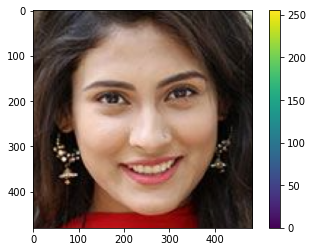

Pakistani-Female 92.34%


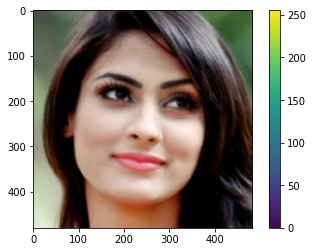

Srilanka-Male 39.53%


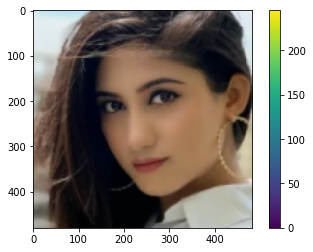

Pakistani-Female 85.48%


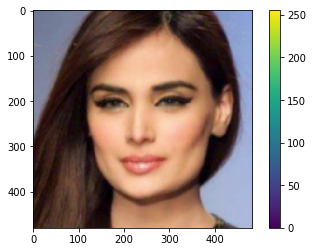

Thailand-Female 96.96%


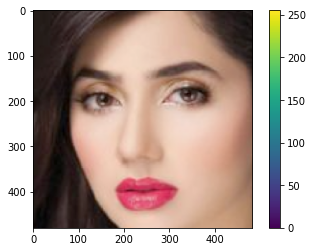

Pakistani-Female 32.50%


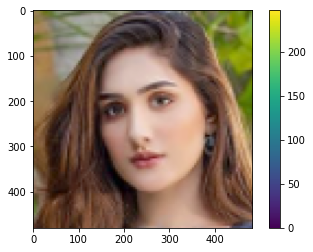

Srilanka-Female 76.36%


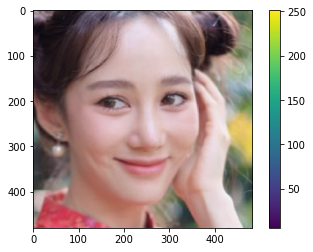

Thailand-Female 98.34%


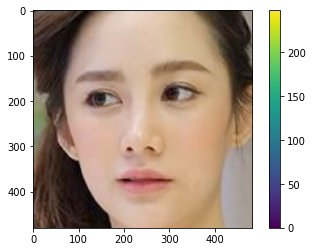

Thailand-Male 57.87%


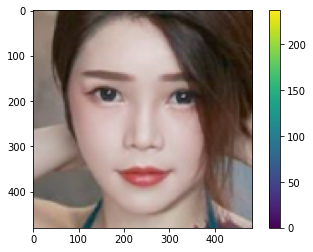

Pakistani-Male 79.68%


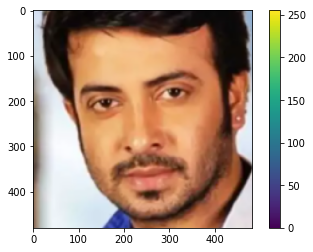

AttributeError: 'NoneType' object has no attribute 'any'

In [5]:
Train_Height = 480
Train_Width = 484
for i in range(1,16):
    path = 'dataset/test-data/'+str(i)+'.png'
    cropped_array = cropper.crop(path)
    if cropped_array.any():
        cropped_image = Image.fromarray(cropped_array)
        cropped_image.save(path)
    img = image.load_img(path,target_size=(Train_Height,Train_Width,3))
    plt.imshow(img)
    plt.colorbar()
    img = image.img_to_array(img)
    img = img/255.0
    img = img.reshape(1,Train_Height,Train_Width,3)
    y_prob = model.predict(img)
    top_predicts = np.argsort(y_prob[0])[:-4:-1]
    rs = AllNations[top_predicts[0]] + str(" {:.2f}".format(max(y_prob[0])*100))+'%' #+ str(top_predicts)
    print(rs)
    plt.show()
    plt.close()
